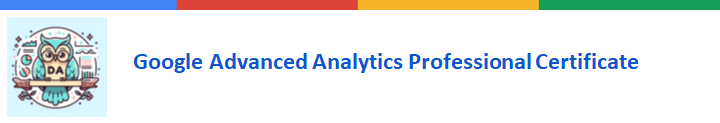

# Follow-along guide: EDA using basic data functions with Python

## Introduction
Throughout this notebook, we will implement discovering skills on a dataset. Before getting started, watch the associated instructional video and complete the in-video question. All of the code we will be implementing and related instructions are contained in this notebook.

## Overview
In this notebook, we will use pandas to examine 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA). Then, we will calculate the total number of strikes for each month and plot this information on a bar graph.

## Import packages and libraries
Before getting started, we will need to import all the required libraries and extensions. Throughout the course, we will be using pandas, numpy, and datetime for operations, and matplotlib, pyplot, and seaborn for plotting.

In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [27]:
# Read in the 2018 lightning strike dataset
# I had to use Absolute path with r because relative path didn't work, unsure if related to file name
df = pd.read_csv(r'C:\Users\DAD\Jupyter Lab Notebooks\csv_files\eda_using_basic_data_functions_in_python_dataset1.csv')


In [28]:
# Inspect the first 10 rows.
df.head(15)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


Notice that the data is sructured as one row per day along with the geometric location of the strike


a quick way to determine how many rows and columns of data there are in total is to use df.shape. The information will be output as: ([rows],[colunmns])

In [29]:
df.shape

(3401012, 3)

the total number of rows is 3,401,012 and there are three columns

In [30]:
#Get more information about the data, including data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


#Convert the date column to datetime

info will provide the total number of rows (3,401,012) and columns (3). It will also state the names and data types of each column, as well as the size of the dataframe in memory.

In this case, notice that the date column is an 'object' type rather than a 'date' type. Objects are strings. When dates are encoded as strings, they cannot be manipulated as easily. Converting string dates to datetime will enable you to work with them much more easily.

Let's convert to datetime using the pandas function to_datetime().


In [31]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


# Calculate the days with the most strikes
As part of discovering, you want to get an idea of the highest data points. For this dataset, we can calculate the top 10 days of 2018 with the most number of lightning strikes using the groupby(), sum(), and sort_values functions from pandas.

When using groupby() on the date column, the function combines all rows with the same date into a single row.

Then using sum() performs a sum calculation on all other summable columns. In this case, we are summing all the lightning strikes that happened on each day. Notice that the center_point_geom column is not included in the output. That's because, as a string object, this column is not summable.

Finally, sort_values() returns the results in descending order of total strikes for each day in the data.



In [34]:
# Calculate days with most lightning strikes.

df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10)

,number_of_strikes,center_point_geom
date,,
2018-08-29,1070457,POINT(-85.7 29.1)POINT(-85.6 29.1)POINT(-84.5 ...
2018-08-17,969774,POINT(-80.6 20.3)POINT(-80.5 20.3)POINT(-80.4 ...
2018-08-28,917199,POINT(-108.2 28)POINT(-108.1 28)POINT(-108 28)...
2018-08-27,824589,POINT(-109 24.8)POINT(-108 24.8)POINT(-88.1 24...
2018-08-30,802170,POINT(-75.7 19)POINT(-75.6 19)POINT(-78 20)POI...
2018-08-19,786225,POINT(-73 35)POINT(-103 35)POINT(-101 35)POINT...
2018-08-18,741180,POINT(-110.7 46)POINT(-104.9 46)POINT(-115.1 4...
2018-08-16,734475,POINT(-97 20)POINT(-77 20)POINT(-96.9 20)POINT...
2018-08-31,723624,POINT(-95.2 48.4)POINT(-96 48.1)POINT(-96.1 48...


# Extract the month data

Next, we will extract the month data from the date column and add that extracted month data into a new column called month. dt.month extracts just the month information (as a numeric value) from the date. This is why converting the date column to datetime is very useful.

In [35]:
# Create a new 'month' column
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


# Calculate the total number of strikes per month

Now we will sort out values by most strikes per month. Use groupby(), sum() and sort_values() from pandas again

In [40]:
# Calculate the total number of strikes per month

df.groupby(['month']).sum('numeric_only=True').sort_values('number_of_strikes', ascending=False).head(12)

#numeric_df = df.select_dtypes(include=[int, float])
#result = numeric_df.groupby(df['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)
#print(result)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


A common mistake among data professionals is using count() instead of sum(), and vice versa. In thjis case, count() would return the number of occurrences of each date in the dataset, which is not the desired result.


# Extract the month data
Next we will extract the mont data from the date column and add that extracted month data into a new column called month. dt.month extracts just the month information (as a numeric value) from the date. This is why converting the date column to datetime is very useful
        

In [41]:
# Create a new 'month' column
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


# Calculate the number of strikes per month

Now we will sort our values by most strikes per month. Use groupby(), sum() and sort_values() from pandas again

In [43]:
# Calculate total number of strikes per month
df.groupby(['month']).sum('numeric_only=True').sort_values('number_of_strikes', ascending=False).head(12)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


# Convert the month number to text

To help read the data more easily, let's convert the month number to text using the datetime function dt.month_name() and add this as a new column in the dataframe. str.slice will omit the text after the first three letters.
    

In [44]:
# Create a new 'month_txt' column.
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


# Create a new dataframe

The objective is to plot the total number of strikes per month as a bar graph. To help withthe plotting we will create a new dataframe called df_by_month.
This will allow us to easily access the month, month text, and total number of strikes for each month.


In [47]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month','month_txt']).sum('numeric_only=True').sort_values('month', ascending=True).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


# Make a bar chart

Now, lets make a bar chart. Pyplot's plt.bar() function takes positional arguments of x and height, representing the data used for the x- and y- axes, respectively. the x-axis will represent months, and the y-axis will represent strike count.


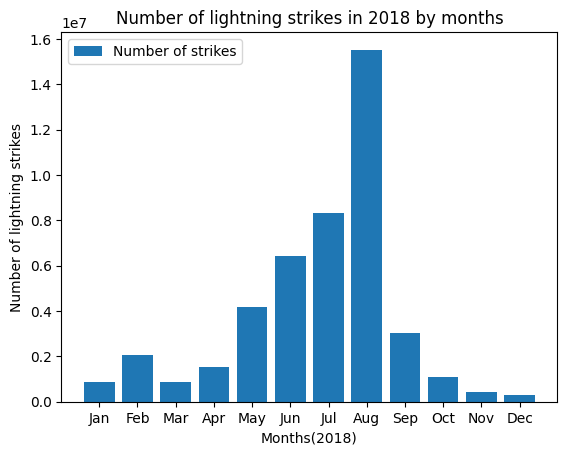

In [48]:
plt.bar(x=df_by_month['month_txt'], height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()